# Machine Learning and its Application for Finance 
# Final project 
# Adyranova Diana Kanatovna 
# CreditScore  predicting and evaluation

# Transactional data to predicting the creditscore
Creditworthiness is currently very important to everyone as it is perceived as a measure of the reliability of a person. In different cases, service providers first need to assess the credit history of customers and then determine whether or not they can deliver the service. Testing the entire private portfolios and producing a credit report manually, however is time-consuming. Thus, since it is time-saving and readily understandable, the credit score is generated and implemented for this purpose. 
Credit scoring is called the method of creating the credit value. It is widely used particularly in banking in many industries. Banks normally use it to decide who should receive credit, how much credit should be earned and how operationally the risk is minimized. Two major sections are usually contained: 
* Statistical Model Design 
* Apply a statistic model to assign a score to an existing credit application or account


Let's imagine that one bank evaluates the data of all future clients with instructions to analyze
their credit history with personal data. Based on the evaluation and predicting on the python program, it will be known which client is better to provide a loan.
My aim of the project to build the model for bank which expect to receive the data about clients for whom the bank can provide a credit and to whom not.
My main motivation of this to practice the new skills from machine learning course.The dataset has been founded in internet and consist of one CSV file.
The transactional dataset consists of the private information of 4446 bank's clients. 

The file dataset is as follow:
* Creditscore (CreditScore.csv)


The following resources were used to create this project:
* [intro to credit scorecard](https://towardsdatascience.com/intro-to-credit-scorecard-9afeaaa3725f)
* [credit risk model and scorecard](https://towardsdatascience.com/how-to-develop-a-credit-risk-model-and-scorecard-91335fc01f03)    
* [building credit scorecards using statistical methods and business-logic](https://blogs.sas.com/content/subconsciousmusings/2019/01/18/building-credit-scorecards-using-statistical-methods-and-business-logic/)
* [how to score your credit](https://medium.com/henry-jia/how-to-score-your-credit-1c08dd73e2ed)
* [my credit scoring model](https://www.kaggle.com/ajay1735/my-credit-scoring-model)

# Hypotheses of project: 
1. Alternate - As a feature selection algorithm, Trees and K-mean can improve the accuracy and efficiency of the credit score 
prediction model.

2. Null - As a function selection algorithm, Trees and K-mean one of these approaches would not enhance the accuracy and efficiency of
the credit score prediction model.
3. The credit will be approved if it is good (1)

4. The credit won't be approved if it is bad (0)

5. Correlation analysis of variables

# CreditScore description 
I will now offer some information on how to build a scorecard. 
The first variable is a categorical binary target variable. And the other variables are the characteristics.

## Loading the  file csv data 

     Status  Seniority   Home  Time  Age  Marital  Records        Job  \
0      good          9   rent    60   30  married   no_rec  freelance   
1      good         17   rent    60   58    widow   no_rec      fixed   
2       bad         10  owner    36   46  married  yes_rec  freelance   
3      good          0   rent    60   24   single   no_rec      fixed   
4      good          0   rent    36   26   single   no_rec      fixed   
...     ...        ...    ...   ...  ...      ...      ...        ...   
4441    bad          1   rent    60   39  married   no_rec      fixed   
4442   good         22  owner    60   46  married   no_rec      fixed   
4443    bad          0  owner    24   37  married   no_rec    partime   
4444   good          0   rent    48   23   single   no_rec  freelance   
4445   good          5  owner    60   32  married   no_rec  freelance   

      Expenses  Income  Assets  Debt  Amount  Price  
0           73     129       0     0     800    846  
1           48 

(array([1.333e+03, 2.301e+03, 5.860e+02, 1.530e+02, 4.500e+01, 1.700e+01,
        2.000e+00, 4.000e+00, 3.000e+00, 2.000e+00]),
 array([  1. ,  96.8, 192.6, 288.4, 384.2, 480. , 575.8, 671.6, 767.4,
        863.2, 959. ]),
 <a list of 10 Patch objects>)

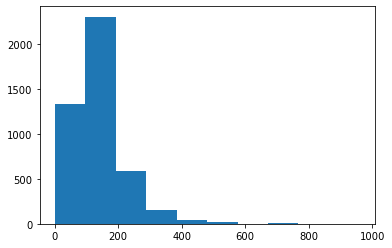

In [42]:
# Short description our credits showing the data from income.The table shows that the approximate income from each client varies from 100 to 200
# Code to read csv file into python:
import matplotlib.pyplot as plt
import pandas as pd
# Load the file
df = pd.read_csv("CreditScore.csv")
print(df)

plt.hist(df['Income'])


In [ ]:
# Income 
Our income from clients is: 
* 0 - 1. 
* 100-96.8
* 200-192.6
* 300-288.4
* 400- 384.2
* 500-480.
* 600- 575.8

(array([ 973.,    0., 2106.,    0.,  782.,    0.,  246.,    0.,  319.,
          20.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

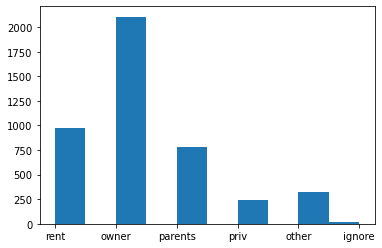

In [43]:
# the table shows the properties of the assessed clients where we can see most of the clients are homeowners. 
plt.hist(df['Home'])


In [ ]:
# Home 
the table provides statistical information about the status of our clients' property:
* rent - 973
* owner -2106
* parents - 782
* priv - 246
* other - 319 
* ignore - 20

(array([3197.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1249.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

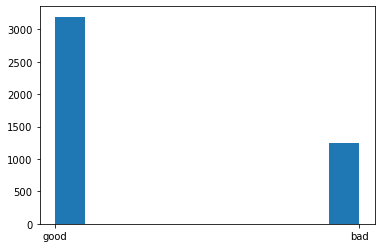

In [44]:
# According to these tables, we can say that more satisfactory results 3197 prevail in our data
plt.hist(df['Status'])


In [ ]:
# Status
the status table provides us with statistical information on granting a loan:
* Goog -3197
* Bad - 1249


37.084120557804766
10.986365810669367


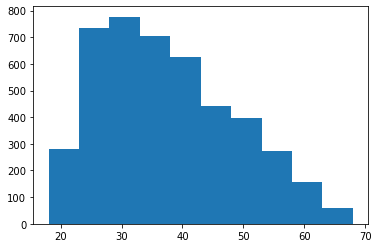

In [45]:
plt.hist(x = df['Age'])
print(df['Age'].mean())
print(df['Age'].std())


In [ ]:
# Age 
age table compiles statistical information on the ages  mean of clients who apply for a loan:
* 37

# Exploratory data analysis (charts, correlations, statistical tests)

## For a quick calculation, I will reduce our data to 1000 person using the code random.seed().
My variables:
* Status - loan status
* Seniority - work experience in years 
* Home - owners (type) of housing 
* Time - terms of the requested loan
* Age - age
* Marital - family status
* Records - is there any previous information on debts
* Job - type of employment
* Expenses - spending 
* Income - profit 
* Assets - property
* Debt - debt 
* Amount - the amount of the requested loan
* Price -  the price of the goods for the purchase of which the loan is requested

In [46]:
import random
random.seed(1000)

import pandas as pd

credit = df.sample(n=1000, random_state=1)
print(credit.head())




     Status  Seniority     Home  Time  Age  Marital Records        Job  \
3575   good         20    owner    48   60  married  no_rec  freelance   
2996    bad          7     rent    48   43  married  no_rec      fixed   
44     good          1  parents    60   26   single  no_rec    partime   
2118   good          7  parents    30   29   single  no_rec      fixed   
909    good         15     rent    60   42  married  no_rec      fixed   

      Expenses  Income  Assets  Debt  Amount  Price  
3575        35     142   12000     0     500   1154  
2996        44      92       0     0    1300   1653  
44          35     120       0     0    1150   1300  
2118        35     250    3500     0     500   1634  
909         58     130       0     0    1000   1308  


## Because I didn't have the m pip install sklear, I uploaded to  interpret my string data (i.e. Status) into numbers.
The conversion of string data into digital was necessary for the convenience of predicting the most accurate predictions in subsequent methods
Data pipelines assist the automation flow of common steps in manual data science. For a number of transformations over either continuous or nominal characteristics, this action set may create broad data pipelines. 
For building a single pipeline, there are just a few steps: 
* Assign the functions to variables
* Create transformations of variables
* Add transformations to be applied to data later

My dataset has the column “Status” including the two variables named good and bad.
It's mean the Status row will have data which look like good or bad after coding it's will look like: 
 * 1 - good 
 * 0 - bad
    
It was necessary for building graphs, charts and calculating statistics with subsequent evaluation and predicting.



In [19]:
import sys
!{sys.executable} -m pip install sklearn


In [47]:
# This is my result after using the code
print(credit.columns)
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
cols = credit.columns
for i in cols:
    if isinstance(credit[i][1], str):
        lb_make = LabelEncoder()
        credit[i] = lb_make.fit_transform(credit[i])


print(credit.head())

Index(['Status', 'Seniority', 'Home', 'Time', 'Age', 'Marital', 'Records',
       'Job', 'Expenses', 'Income', 'Assets', 'Debt', 'Amount', 'Price'],
      dtype='object')
      Status  Seniority  Home  Time  Age  Marital  Records  Job  Expenses  \
3575       1         20     2    48   60        1        0    1        35   
2996       0          7     5    48   43        1        0    0        44   
44         1          1     3    60   26        3        0    3        35   
2118       1          7     3    30   29        3        0    0        35   
909        1         15     5    60   42        1        0    0        58   

      Income  Assets  Debt  Amount  Price  
3575     142   12000     0     500   1154  
2996      92       0     0    1300   1653  
44       120       0     0    1150   1300  
2118     250    3500     0     500   1634  
909      130       0     0    1000   1308  


## I am using two different codes for data validation.

In [48]:
## Check if data is loaded
dfs = dict()
dfs["CreditScore.csv"] = pd.read_csv('CreditScore.csv')

In [49]:
# Number of non-Nanan entries
##Data info
dfs["CreditScore.csv"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446 entries, 0 to 4445
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Status     4446 non-null   object
 1   Seniority  4446 non-null   int64 
 2   Home       4446 non-null   object
 3   Time       4446 non-null   int64 
 4   Age        4446 non-null   int64 
 5   Marital    4446 non-null   object
 6   Records    4446 non-null   object
 7   Job        4446 non-null   object
 8   Expenses   4446 non-null   int64 
 9   Income     4446 non-null   int64 
 10  Assets     4446 non-null   int64 
 11  Debt       4446 non-null   int64 
 12  Amount     4446 non-null   int64 
 13  Price      4446 non-null   int64 
dtypes: int64(9), object(5)
memory usage: 486.4+ KB


In [50]:
# Checking data in tabulated form with limits 1000
dfs["CreditScore.csv"].head(1000)

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,good,9,rent,60,30,married,no_rec,freelance,73,129,0,0,800,846
1,good,17,rent,60,58,widow,no_rec,fixed,48,131,0,0,1000,1658
2,bad,10,owner,36,46,married,yes_rec,freelance,90,200,3000,0,2000,2985
3,good,0,rent,60,24,single,no_rec,fixed,63,182,2500,0,900,1325
4,good,0,rent,36,26,single,no_rec,fixed,46,107,0,0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,good,13,owner,60,42,married,no_rec,fixed,60,107,4000,0,1000,1359
996,good,0,owner,36,54,married,no_rec,others,45,134,2500,0,625,801
997,bad,2,rent,60,24,single,no_rec,fixed,35,81,0,0,850,989
998,good,21,rent,60,39,married,no_rec,fixed,124,191,2000,0,2000,2536


In [51]:
#Checking for missing data in dataframe
df.isnull().sum()

Status       0
Seniority    0
Home         0
Time         0
Age          0
Marital      0
Records      0
Job          0
Expenses     0
Income       0
Assets       0
Debt         0
Amount       0
Price        0
dtype: int64

In [52]:
# Checking data in tabulated form without limits
sample_data = pd.read_csv('CreditScore.csv')

In [53]:
sample_data

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,good,9,rent,60,30,married,no_rec,freelance,73,129,0,0,800,846
1,good,17,rent,60,58,widow,no_rec,fixed,48,131,0,0,1000,1658
2,bad,10,owner,36,46,married,yes_rec,freelance,90,200,3000,0,2000,2985
3,good,0,rent,60,24,single,no_rec,fixed,63,182,2500,0,900,1325
4,good,0,rent,36,26,single,no_rec,fixed,46,107,0,0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4441,bad,1,rent,60,39,married,no_rec,fixed,69,92,0,0,900,1020
4442,good,22,owner,60,46,married,no_rec,fixed,60,75,3000,600,950,1263
4443,bad,0,owner,24,37,married,no_rec,partime,60,90,3500,0,500,963
4444,good,0,rent,48,23,single,no_rec,freelance,49,140,0,0,550,550


In [54]:
# Checking the type of data
type(sample_data)

pandas.core.frame.DataFrame

In [55]:
# import matplotlib.pyplot
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

df = pd.read_csv("CreditScore.csv")
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,good,9,rent,60,30,married,no_rec,freelance,73,129,0,0,800,846
1,good,17,rent,60,58,widow,no_rec,fixed,48,131,0,0,1000,1658
2,bad,10,owner,36,46,married,yes_rec,freelance,90,200,3000,0,2000,2985
3,good,0,rent,60,24,single,no_rec,fixed,63,182,2500,0,900,1325
4,good,0,rent,36,26,single,no_rec,fixed,46,107,0,0,310,910


In [56]:
top_10 = (df.groupby('Status')['Amount', 'Price'].agg({'Amount': 'count', 'Price': 'sum'})
          .sort_values(by='Amount', ascending=False))[:10].reset_index()
top_10.rename(columns={'Status':'Status', 'Amount': 'Amount', 'Price': 'Price'}, inplace=True)
print(top_10)

  Status  Amount    Price
0   good    3197  4662810
1    bad    1249  1839378


<ipython-input-56-d5436f6d724d>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  top_10 = (df.groupby('Status')['Amount', 'Price'].agg({'Amount': 'count', 'Price': 'sum'})


# Statistics represent in what amount and how much has been approved:
* for good clients was presented in the amount of 3197 earned 46622810
* for bad customers was presented in the amount of 1249, earned 1839378

In [58]:
# By reason of matplotlib has many different styles available for rendering plots.I can see which ones are available on my system using plt.style.available .
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [59]:
# Summary statistics
df.describe()

,Seniority,Time,Age,Expenses,Income,Assets,Debt,Amount,Price
count,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000,4446.000000
mean,7.991453,46.453441,37.084121,55.601439,140.629780,5354.948943,342.257085,1038.763383,1462.480432
std,8.176370,14.647979,10.986366,19.520839,80.177896,11534.328183,1244.694549,474.747952,628.555171
min,0.000000,6.000000,18.000000,35.000000,1.000000,0.000000,0.000000,100.000000,105.000000
25%,2.000000,36.000000,28.000000,35.000000,90.000000,0.000000,0.000000,700.000000,1116.250000
50%,5.000000,48.000000,36.000000,51.000000,124.000000,3000.000000,0.000000,1000.000000,1400.000000
75%,12.000000,60.000000,45.000000,72.000000,170.000000,6000.000000,0.000000,1300.000000,1691.500000
max,48.000000,72.000000,68.000000,180.000000,959.000000,300000.000000,30000.000000,5000.000000,11140.000000


# Statistics
statistical data is provided to fully understand the data. given in the table:
* Count - total number of clients
* Mean -  average value
* Std - standart deviation 
* Min - minimum value
* 25%
* 50%
* 75%
* Max - maximum value


In [61]:
# Sorting  amuont a variable
df_sort = df.sort_values(by = 'Amount', ascending=False).head()
df_sort.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
1887,bad,27,owner,18,47,married,yes_rec,freelance,75,95,148,1,5000,6500
2683,bad,5,ignore,48,46,married,no_rec,freelance,75,91,6000,0,4500,6222
2383,bad,3,owner,60,39,married,no_rec,freelance,75,491,90000,0,4000,6700
3131,bad,10,owner,48,63,married,yes_rec,freelance,35,134,3000,0,4000,4769
3919,good,0,parents,48,22,single,no_rec,freelance,45,134,0,0,4000,4500


# Amount
Dividing the number of loans provided by the amount requested

### The histogram shows the amounts of molney requested by clients from the bank

(array([7.060e+02, 1.823e+03, 1.450e+03, 3.770e+02, 5.600e+01, 2.200e+01,
        2.000e+00, 8.000e+00, 1.000e+00, 1.000e+00]),
 array([ 100.,  590., 1080., 1570., 2060., 2550., 3040., 3530., 4020.,
        4510., 5000.]),
 <a list of 10 Patch objects>)

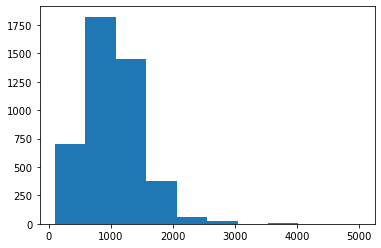

In [63]:
# Histogram of contineous numbericalvariable
num_bins=(1000)
plt.hist(df['Amount'])

## This is a chart showing the approximate income from credit

(array([1.333e+03, 2.301e+03, 5.860e+02, 1.530e+02, 4.500e+01, 1.700e+01,
        2.000e+00, 4.000e+00, 3.000e+00, 2.000e+00]),
 array([  1. ,  96.8, 192.6, 288.4, 384.2, 480. , 575.8, 671.6, 767.4,
        863.2, 959. ]),
 <a list of 10 Patch objects>)

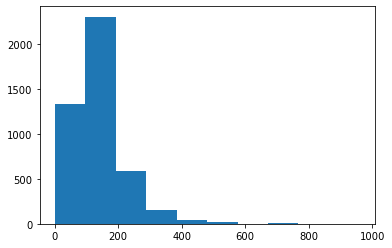

In [64]:
plt.hist(df['Income'])

In [69]:
#Count by catagory -cross tabulate
credit_dist = df.groupby('Amount').size()

In [70]:
credit_dist

Amount
100     5
105     1
107     1
120     1
125     3
       ..
3875    1
3900    1
4000    4
4500    1
5000    1
Length: 285, dtype: int64

In [71]:
# Select all numerical variables
df_num = df.select_dtypes(include=['float64','int64'])
df_num.head()

,Seniority,Time,Age,Expenses,Income,Assets,Debt,Amount,Price
0,9,60,30,73,129,0,0,800,846
1,17,60,58,48,131,0,0,1000,1658
2,10,36,46,90,200,3000,0,2000,2985
3,0,60,24,63,182,2500,0,900,1325
4,0,36,26,46,107,0,0,310,910


## Show data in a histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000238C95E0550>,
      dtype=object)

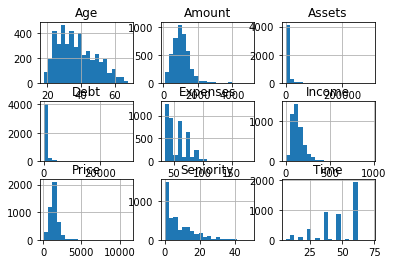

In [72]:
df_num.hist(bins=20)

# Description of methodology and methods
### Providing the  Trees method (Supervised) learning method
A non-parametric approach due to Breiman, Friedman, Olshen and Stone is Classification and Regression Trees (CART) (1984).
It is a versatile and effective technique; however it is primarily used in banking practice only as a supporting tool 
to complement the previously mentioned parametric estimation methods. It serves to pick regressors or features with 
the highest explanatory capacity, for example, in the method. Binary trees are used in the CART system and a dataset
is grouped into a finite number of groups. It was originally designed as a binary response method and as such is suitable 
for use in credit scoring where data includes default and non-default responses. In subsequent editions of Breiman, Friedman, 
Olshen and Stone, the CART approach was later refined (1984).
The reason of Trees method can be utilized to clean factors, discover parts in shorts of different factors, break information  in fragments, and offer basic bits of knowledge. 
Likewise it is conceivable to produce countless trees which perform proportionately yet may look endlessly changed. 
They are ideal for creating straw credit strategies for rule based frameworks for straightforward requirements.
As far as demonstrating uncommon occasions like misrepresentation or low default credit portfolios utilizing earlier
probabilities to design trees can help improve execution.

# Trees method

In [73]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

train, test = train_test_split(credit, test_size=0.2)


print(train.shape)
print(test.shape)

(800, 14)
(200, 14)


In [ ]:
# Using all colums to predict accuracy of tree model

In [74]:
col_ =[1,2,4,5,13]

In [75]:

from sklearn import tree
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
Y = train.Status
X = train.iloc[:, col_]


feature_names = list(X.columns)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

r = tree.export_text(clf, feature_names=feature_names)

print(r)

|--- Seniority <= 2.50
|   |--- Home <= 3.50
|   |   |--- Age <= 34.50
|   |   |   |--- Price <= 1156.50
|   |   |   |   |--- Age <= 26.50
|   |   |   |   |   |--- Seniority <= 1.50
|   |   |   |   |   |   |--- Age <= 21.50
|   |   |   |   |   |   |   |--- Seniority <= 0.50
|   |   |   |   |   |   |   |   |--- Price <= 960.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- Price >  960.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- Seniority >  0.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- Age >  21.50
|   |   |   |   |   |   |   |--- Price <= 965.00
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- Price >  965.00
|   |   |   |   |   |   |   |   |--- Age <= 24.50
|   |   |   |   |   |   |   |   |   |--- Price <= 1083.00
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- Price >  1083.00
|   |   |   |   

In [76]:
from sklearn import metrics
Y_test = test.Status
X_test = test.iloc[:, col_]

Y_tree_pred = clf.predict(X_test)

print("Accuracy of tree model: ", metrics.accuracy_score(Y_test, Y_tree_pred))

Accuracy of tree model:  0.675


# TREES 
According to this method, our tree provided a branch of probabilities with the best loan provision and showed a frequency of 0.675

# Providing K-mean (Unsupervised) learning methods

# K-mean

## 
K-Means falls under the category of centroid-based clustering. A centroid is a data point (imaginary or real) at the center of a cluster. In centroid-based clustering, clusters are represented by a central vector or a centroid. This centroid might not necessarily be a member of the dataset. Centroid-based clustering is an iterative algorithm in which the notion of similarity is derived by how close a data point is to the centroid of the cluster.
The method helps us transform data into numbers making it easier to predict data

In [77]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
kmeans.labels_

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,

In [79]:
#filter rows of original data
filtered_label0 = kmeans[kmeans.labels_ == 0]
 
filtered_label1 = kmeans[kmeans.labels_ == 1]
 
#Plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1] , color = 'red')
plt.scatter(filtered_label1[:,0] , filtered_label1[:,1] , color = 'black')
plt.show()

TypeError: 'KMeans' object is not subscriptable

### The accuracy of the data shows that the first method is more effective and more accurate (i.e. more chances of approving a loan)

In [80]:
Y_kmean_pred = kmeans.predict(X_test)
print("Accuracy of K-mean model: ", metrics.accuracy_score(Y_test, Y_kmean_pred))
print("Accuracy of tree model: ", metrics.accuracy_score(Y_test, Y_tree_pred))
print(X_test)

Accuracy of K-mean model:  0.655
Accuracy of tree model:  0.675
      Seniority  Home  Age  Marital  Price
1272          3     5   34        3    921
393          15     2   44        1   1450
3982          6     5   38        1   1303
1094          1     2   28        1   1695
216           4     4   31        1   1218
...         ...   ...  ...      ...    ...
4295          2     5   27        1    650
1540         40     2   60        1   1308
769          14     1   41        1   1200
1720          0     1   43        1   1544
290           6     2   42        1   1513

[200 rows x 5 columns]


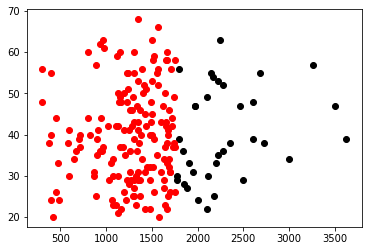

In [ ]:
#filter rows of original data
filtered_label0 = X_test[Y_kmean_pred == 0]
 
filtered_label1 = X_test[Y_kmean_pred == 1]
 
#Plotting the results: Age and Price
plt.scatter(filtered_label0.iloc[:,-1] , filtered_label0.iloc[:,2] , color = 'black')
plt.scatter(filtered_label1.iloc[:,-1] , filtered_label1.iloc[:,2] , color = 'red')
plt.show()

In [ ]:
# K-mean 
thanks to this graph, we can see visually who the loan is given.

### Here is a visual comparison of the methods.
One person was taken from the available data, who is awaiting approval in the loan, and based on these methods, such a result was obtained. 
In the first method, his application was approved when in the second method, his application was rejected.

In [81]:
a_man = credit.iloc[0, :]

a_man = pd.DataFrame(data=[list(a_man)],columns= list(a_man.index))

X_man = a_man.iloc[:, col_]

print("Status of a_man by tree model is: ", clf.predict(X_man)[0])
print("Status of a_man by K-mean model is: ", kmeans.predict(X_man)[0])

Status of a_man by tree model is:  1
Status of a_man by K-mean model is:  1


## Total number of approved and rejected credits

In [89]:
#Count by catagory -cross tabulate
credit_dist = df.groupby('Status').size()

In [90]:
credit_dist

Status
bad     1249
good    3197
dtype: int64

# Conclusion 

# 
We have identified the most common methods used in the process of credit scoring of retail loan applicants in this project. Our analysis focuses on the most important methods that relate to their use in bank practice. Most local banks use models based on the logit equation, which is an extension of linear discriminant analysis, which is very tractable and convenient, according to personal analysis. Other approaches, such as CART or neural networks, are primarily used as support tools, either in the variable selection process or in the model quality assessment process. The k-mean approach that is known is not used at all or is used very rarely. As the alternative (nonparametric) approaches have excellent potential for pattern detection, these facts are very surprising.